<center>
<img src="../../img/ml_theme.png">
# Майнор "Интеллектуальный анализ данных" 
# Курс "Введение в анализ данных"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель ФКН НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="http://www.microsoft.com/en-us/openness/default.aspx#Ms-RL">Ms-RL</a>. Можно использовать в любых целях, но с обязательным упоминанием автора курса и аффилиации.

# Семинар 2. Python для анализа данных. Средства визуализации. Pandas, Matplotlib, Seaborn. 
## Часть 1. Обзор библиотеки Pandas

**Pandas** - это библиотека Python, предоставляющая широкие возможности для анализа данных. С ее помощью очень удобно загружать, обрабатывать и анализировать табличные данные с помощью SQL-подобных запросов. В связке с библиотеками Matplotlib и Seaborn появляется возможность удобного визуального анализа табличных данных.

In [22]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Основными структурами данных в Pandas являются классы Series и DataFrame. Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Второй - это двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series. Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

Для начала рассмотрим простые примеры создания таких объектов и возможных операций над ними.

### Series

** Создание объекта Series из 5 элементов, индексированных буквами:**

In [2]:
s = pd.Series(np.random.randn(5), 
              index = ['a', 'b', 'c', 'd', 'e']) 
print(s)                                                                 

a    0.299168
b    1.492386
c    1.268641
d    1.623689
e   -0.904980
dtype: float64


**Индексирование возможно в виде s.Name или s['Name'].**

In [3]:
print(s.b == s['b']) 

True


**Series поддерживает пропуски в данных.**

In [4]:
s.c = np.nan # Series can contain missing values
print(s)

a    0.299168
b    1.492386
c         NaN
d    1.623689
e   -0.904980
dtype: float64


**Объекты Series похожи на ndarray и могут быть переданы в качестве аргументов большинству функций из Numpy.**

In [5]:
print('Second element of s is', s[1], '\n')
# Smart indexing
print(s[:3], '\n')
print('There are', len(s[s > 0]), 'positive elements in s\n')
# Series obects can be the arguments for Numpy functions
print(np.exp(s))

Second element of s is 1.49238625214 

a    0.299168
b    1.492386
c         NaN
dtype: float64 

There are 3 positive elements in s

a    1.348737
b    4.447696
c         NaN
d    5.071768
e    0.404550
dtype: float64


### DataFrame

### Создание и изменение

**Перейдём к рассмотрению объектов типа DataFrame. Такой объект можно создать из массива numpy, указав названия строк и столбцов.**

In [6]:
df1 = pd.DataFrame(np.random.randn(5, 3), 
                   index=['o1', 'o2', 'o3', 'o4', 'o5'], 
                   columns=['f1', 'f2', 'f3'])
df1

,f1,f2,f3
o1,-1.071382,-0.602995,-0.324531
o2,1.239684,-2.402117,-0.014188
o3,0.450897,-0.207336,-0.226476
o4,0.424202,-0.287064,-0.647169
o5,1.161264,-0.704823,0.495016


**Альтернативным способом является создание DataFrame из словаря numpy массивов или списков.**

In [7]:
df2 = pd.DataFrame({'A': np.random.random(5), 
                    'B': ['a', 'b', 'c', 'd', 'e'], 
                    'C': np.arange(5) > 2})
df2

,A,B,C
0,0.159413,a,False
1,0.292591,b,False
2,0.837890,c,False
3,0.786657,d,True
4,0.679874,e,True


**Обращение к элементам (или целым кускам фрейма):**

In [8]:
print('The element in position 3, B is', df2.at[3, 'B'], '\n')
print(df2.loc[[1, 4], ['A', 'B']])

The element in position 3, B is d 

          A  B
1  0.292591  b
4  0.679874  e


**Изменение элементов и добавление новых:**

In [9]:
df2.at[2, 'B'] = 'f'
df2

,A,B,C
0,0.159413,a,False
1,0.292591,b,False
2,0.837890,f,False
3,0.786657,d,True
4,0.679874,e,True


In [10]:
df2.loc[5] = [3.1415, 'c', False]
df2

,A,B,C
0,0.159413,a,False
1,0.292591,b,False
2,0.837890,f,False
3,0.786657,d,True
4,0.679874,e,True
5,3.141500,c,False


In [11]:
df1.columns = ['A', 'B', 'C']
df3 = df1.append(df2)
df3

,A,B,C
o1,-1.071382,-0.602995,-0.324531
o2,1.239684,-2.40212,-0.014188
o3,0.450897,-0.207336,-0.226476
o4,0.424202,-0.287064,-0.647169
o5,1.161264,-0.704823,0.495016
0,0.159413,a,0.000000
1,0.292591,b,0.000000
2,0.837890,f,0.000000
3,0.786657,d,1.000000
4,0.679874,e,1.000000


#### Обработка пропущенных значений

In [12]:
df1.at['o2', 'A'] = np.nan
df1.at['o4', 'C'] = np.nan
df1

,A,B,C
o1,-1.071382,-0.602995,-0.324531
o2,NaN,-2.402117,-0.014188
o3,0.450897,-0.207336,-0.226476
o4,0.424202,-0.287064,NaN
o5,1.161264,-0.704823,0.495016


**Булева маска для пропущенных значений (True - там, где был пропуск, иначе - False):**

In [13]:
pd.isnull(df1)

,A,B,C
o1,False,False,False
o2,True,False,False
o3,False,False,False
o4,False,False,True
o5,False,False,False


**Можно удалить все строки, где есть хотя бы один пропуск.**

In [14]:
df1.dropna(how='any')

,A,B,C
o1,-1.071382,-0.602995,-0.324531
o3,0.450897,-0.207336,-0.226476
o5,1.161264,-0.704823,0.495016


**Пропуски можно заменить каким-то значением.**

In [15]:
df1.fillna(0)

,A,B,C
o1,-1.071382,-0.602995,-0.324531
o2,0.000000,-2.402117,-0.014188
o3,0.450897,-0.207336,-0.226476
o4,0.424202,-0.287064,0.000000
o5,1.161264,-0.704823,0.495016


## Часть 2. Пример первичного анализа данных с Pandas

### Чтение из файла и первичный анализ

Однако на практике DataFrame, с которым нам предстоит работать, необходимо считать из некоторого файла. Рассмотрим работу с DataFrame на примере следующего набора данных. Для каждрого опрошенного имеется следующая информация: заработная плата за час работы, опыт работы, образование, внешняя привлекательность (в баллах от 1 до 5), бинарные признаки: пол, семейное положение, состояние здоровья (хорошее/плохое), членство в профсоюзе, цвет кожи (белый/чёрный), занятость в сфере обслуживания (да/нет).

In [37]:
import pandas as pd
df = pd.read_csv('../../data/beauty.csv', sep = ';')

In [13]:
df['wage'].std()

4.6606390371428486

In [7]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


**Посмотрим на размер данных и названия признаков.**

In [14]:
print(df.shape)
print(df.columns.values)

(1260, 10)
['wage' 'exper' 'union' 'goodhlth' 'black' 'female' 'married' 'service'
 'educ' 'looks']


**При работе с большими объёмами данных бывает удобно посмотреть только на небольшие части фрейма (например, начало).**

In [18]:
df.head(4)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3


Метод **describe** показывает основные статистические характеристики данных по каждому признаку: число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [15]:
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


**DataFrame можно отсортировать по значению какого-нибудь из признаков. В нашем случае, например, по размеру заработной платы.**

In [23]:
df.sort(columns='wage', ascending = False).head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
602,77.72,9,1,1,1,1,1,1,13,4
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3


### Индексация и извлечение данных

DataFrame можно индексировать по-разному. В связи с этим рассмотрим различные способы индексации и извлечения нужных нам данных из DataFrame на примере простых вопросов.

Для извлечения отдельного столбца можно использовать конструкцию вида DataFrame['Name']. Воспользуемся этим для ответа на вопрос: **какова доля людей с хорошим здоровьем среди опрошенных?**

In [24]:
df['goodhlth'].mean()

0.9333333333333333

Очень удобной является логическая индексация DataFrame по одному столбцу. Выглядит она следующим образом: df[P(df['Name'])], где P - это некоторое логическое условие, проверяемое для каждого элемента столбца Name. Итогом такой индексации является DataFrame, состоящий только из строк, удовлетворяющих условию P по столбцу Name. Воспользуемся этим для ответа на вопрос: **какова средняя заработная плата среди женщин?**

In [17]:
df[df['female'] == 1].shape

(436, 10)

In [18]:
print(df[df['female'] == 1]['wage'].mean())
df[df['female'] == 0]['wage'].mean()

4.29935779817


7.3688228155339734

**Какова максимальная заработная плата среди мужчин, имеющих членство в профсоюзе, и с опытом работы до 10 лет?**

In [26]:
df[(df['female'] == 0) & (df['union'] > 0)  
   & (df['exper'] < 10)]['wage'].max()

12.82

Извлечь строки с конкретными номерами можно с помощью метода **loc**. Это может быть использовано при разбиении выборки на части. Для примера возьмем случайную подвыборку размера 5.

In [27]:
pd.DataFrame?

In [28]:
df = pd.DataFrame({'age' : [20, 30 , 36],
                  'salary': [45, 57, 89],
                  },
                  index=['Ivan', 'Mike', 'Hugo']
                 )

In [34]:
df['name'] = df.index

In [35]:
df

,age,salary,name
Ivan,20,45,Ivan
Mike,30,57,Mike
Hugo,36,89,Hugo


In [20]:
df.iloc[0,:]

wage         5.73
exper       30.00
union        0.00
goodhlth     1.00
black        0.00
female       1.00
married      1.00
service      1.00
educ        14.00
looks        4.00
Name: 0, dtype: float64

In [27]:
df.loc[np.random.randint(df.shape[0], size = 5)]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
551,4.52,7,0,1,0,1,0,0,13,3
151,6.54,26,1,1,0,1,0,1,14,3
41,13.22,42,0,1,0,0,1,0,16,3
876,1.96,1,0,1,0,1,0,0,13,2
504,6.54,8,0,1,1,1,0,0,13,3


**Применение функции к каждому столбцу:**

In [28]:
df.apply(np.mean) 

wage         6.306690
exper       18.206349
union        0.272222
goodhlth     0.933333
black        0.073810
female       0.346032
married      0.691270
service      0.273810
educ        12.563492
looks        3.185714
dtype: float64

**Группирование данных в зависимости от значения признака *looks* и подсчет среднего значения по каждому столбцу в каждой группе.**

In [40]:
for looks_rating, sub_df in df.groupby('looks'):
    print(looks_rating, sub_df['wage'].mean())

(1, 4.621538461538462)
(2, 5.328802816901409)
(3, 6.504598337950134)
(4, 6.299340659340659)
(5, 7.38842105263158)


In [29]:
g = df.groupby('looks') 
g.mean()

,wage,exper,union,goodhlth,black,female,married,service,educ
looks,,,,,,,,,
1,4.621538,27.000000,0.230769,0.846154,0.153846,0.384615,0.615385,0.307692,10.000000
2,5.328803,18.922535,0.232394,0.936620,0.035211,0.380282,0.711268,0.302817,12.105634
3,6.504598,19.491690,0.310249,0.921053,0.080332,0.322715,0.716066,0.254848,12.421053
4,6.299341,15.406593,0.219780,0.956044,0.074176,0.373626,0.651099,0.299451,13.074176
5,7.388421,11.631579,0.157895,1.000000,0.052632,0.421053,0.421053,0.263158,13.368421


**Обращение к конкретной группе:**

In [30]:
d1 = g.get_group(1)
d1

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
28,8.35,41,0,0,0,0,1,1,16,1
200,3.75,36,0,1,0,0,0,0,12,1
248,10.99,40,0,1,0,0,1,0,12,1
327,1.65,24,0,1,0,1,0,1,13,1
751,7.93,39,1,1,0,0,1,0,12,1
837,5.56,10,0,1,0,0,1,0,13,1
842,7.69,9,1,0,0,0,1,0,12,1
877,2.73,41,0,1,0,0,1,0,8,1
980,2.31,35,1,1,0,0,1,0,5,1
1126,3.46,26,0,1,0,1,0,1,5,1


### Визуализация в Pandas

Метод **scatter_matrix** позволяет визуализировать попарные зависимости между признаками (а также распределение каждого признака на диагонали). Проделаем это для небинарных признаков.

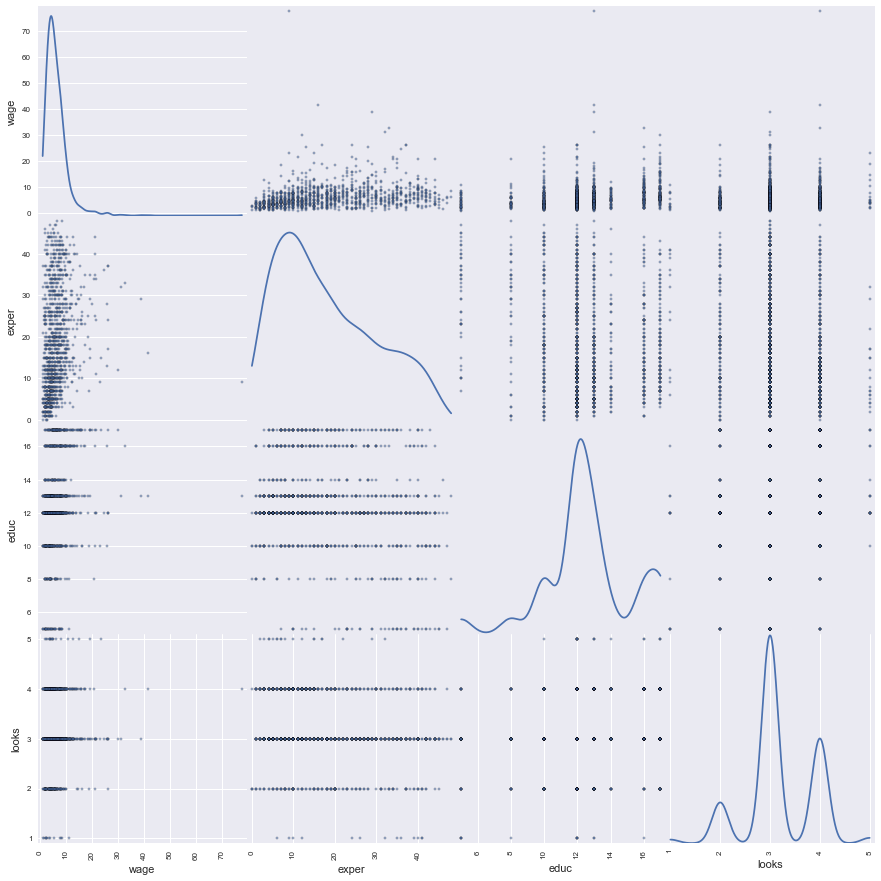

In [31]:
pd.scatter_matrix(df[['wage', 'exper', 'educ', 'looks']], 
                  figsize=(15, 15), diagonal='kde')
plt.show()

**Для каждого признака можно построить отдельную гистограмму:**

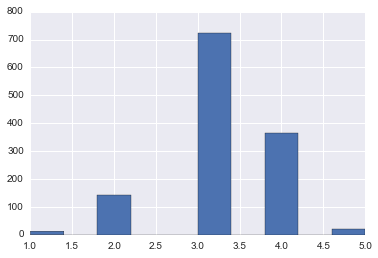

In [32]:
df['looks'].hist()
plt.show()

**Или сразу для всех:**

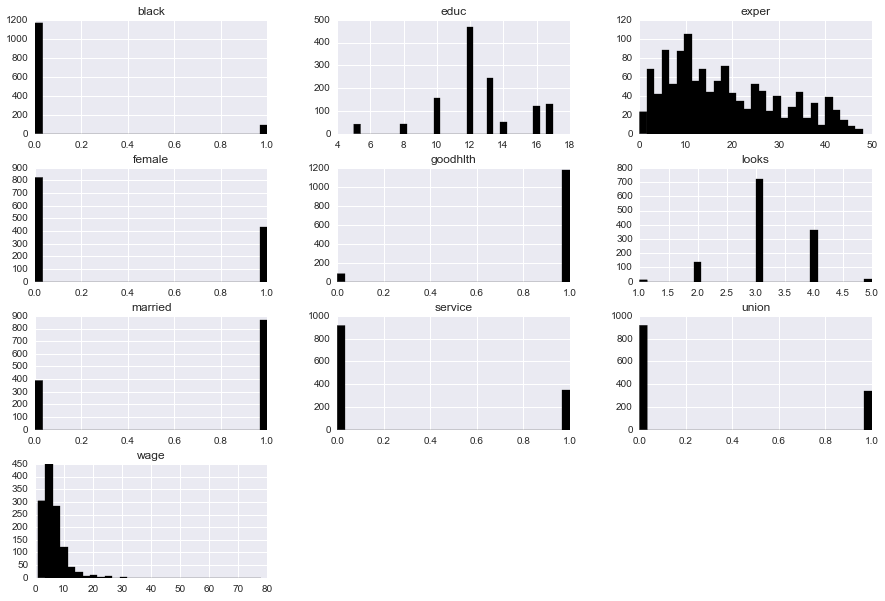

In [33]:
df.hist(color = 'k', bins = 30, figsize=(15,10))
plt.show()

Полезным также является график типа **box plot** ("ящик с усами"). Он позволяет компактно визуализировать основные характеристики (медиану, нижний и верхний квартили, минимальное и максимальное значение, выбросы) распределения признаков.

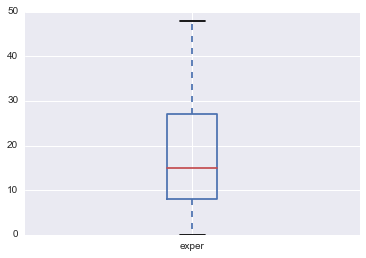

In [34]:
df.boxplot(column='exper')
plt.show()

**Можно сделать это, сгруппировав данные по какому-либо другому признаку:**

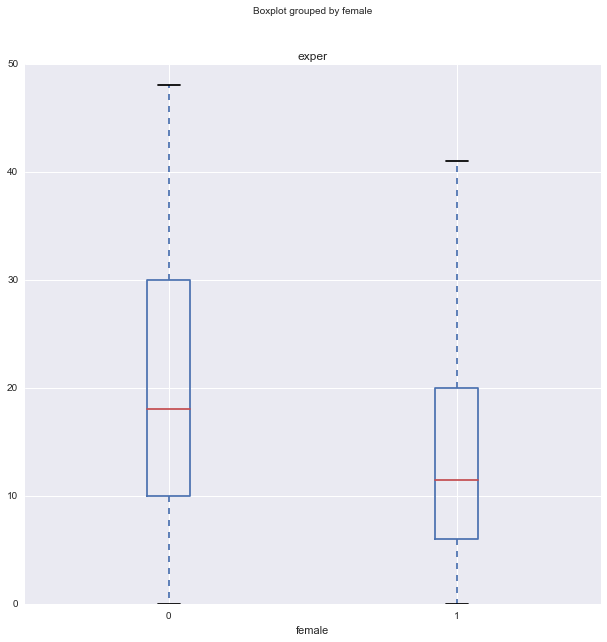

In [35]:
df.boxplot(column='exper',  by='female', figsize=(10,10))
plt.show()